# EDA of the images

as we are using the CIFAR100 dataset, we know that-
- The size of each image is 32 by 32 by 3
- It is a colored RGB
- there are 80 million samples

We don't care about the labels because VAE is unsupervised. but still just to avoid the vae to focus on only one label, lets get the statistics. there are a 100 labels and 600 images per label.

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import Data.DataLoader as dl

First lets go with the distribution of the image pixel intensity values.

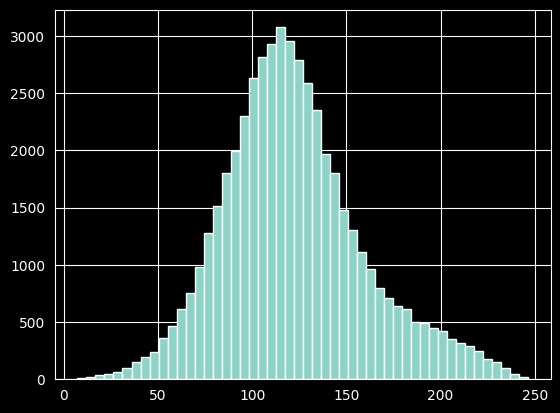

In [60]:
train, test = dl.load_all_data()
train_image_mean = np.mean(train, axis=(1,2,3))
plt.hist(train_image_mean, bins=50)
plt.show()

In [61]:
image_intensity_mean_mean = np.mean(train_image_mean)
image_intensity_mean_std = np.std(train_image_mean)
print(image_intensity_mean_mean, image_intensity_mean_std)

121.936059453125 37.48164515928206


In [62]:
low_intensity_images = train[train_image_mean < image_intensity_mean_mean - 3*image_intensity_mean_std]
print(len(low_intensity_images))
high_intensity_images = train[train_image_mean > image_intensity_mean_mean + 3*image_intensity_mean_std]
print(len(high_intensity_images))

2
110


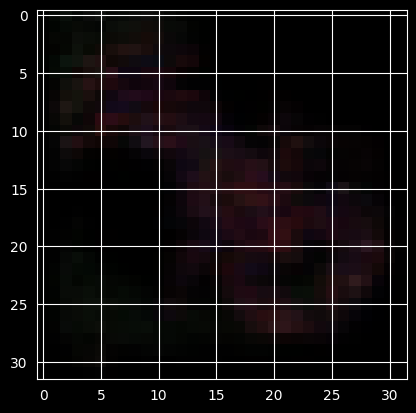

In [63]:
sample_low = low_intensity_images[1]
sample_high = high_intensity_images[37]
plt.imshow(np.transpose(sample_low, (1, 2, 0)))
plt.show()

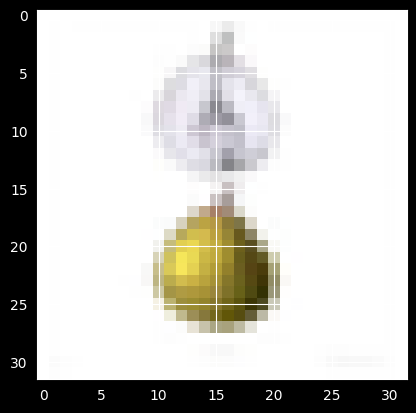

In [64]:
plt.imshow(np.transpose(sample_high, (1, 2, 0)))
plt.show()

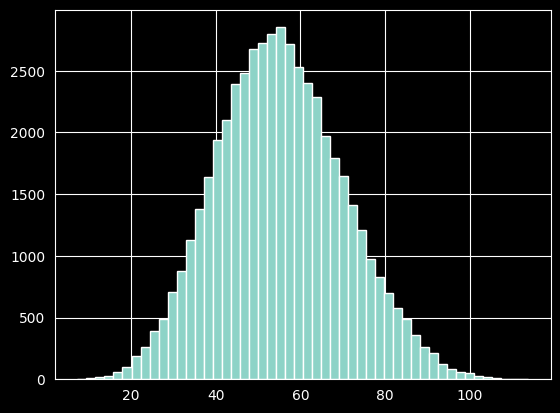

In [65]:
train_image_std = np.std(train, axis=(1,2,3))
plt.hist(train_image_std, bins=50)
plt.show()

In [66]:
images_std_mean = np.mean(train_image_std)
images_std_std = np.std(train_image_std)
print(images_std_mean, images_std_std)

55.197684535241834 15.013037048738894


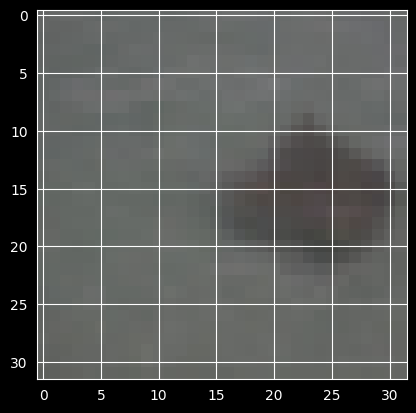

In [67]:
low_contrast_images = train[train_image_std < images_std_mean - 3*images_std_std]
plt.imshow(np.transpose(low_contrast_images[0], (1, 2, 0)))
plt.show()

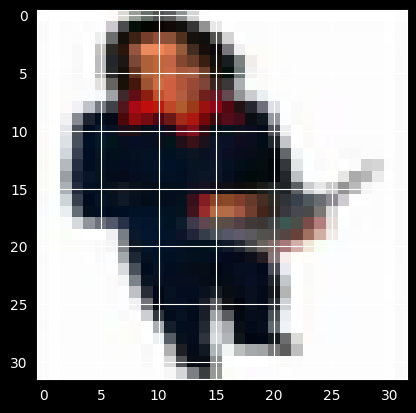

In [68]:
high_contrast_images = train[train_image_std > images_std_mean + 3*images_std_std]
plt.imshow(np.transpose(high_contrast_images[0], (1, 2, 0)))
plt.show()

In [69]:
print(len(low_contrast_images), len(high_contrast_images))

6 79


seems like low contrast images and low intensity images are less compared to high contrast and high intensity, suggesting slight skew.
Now let us see some quick spatial statistics.

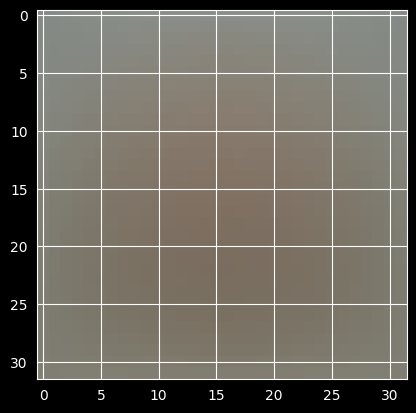

In [70]:
mean_image = np.mean(train, axis = 0)
mean_image /= 255
plt.imshow(np.transpose(mean_image, (1, 2, 0)))
plt.show()

seems like the main part of the image is always at the center as there is a little darkened part over there.

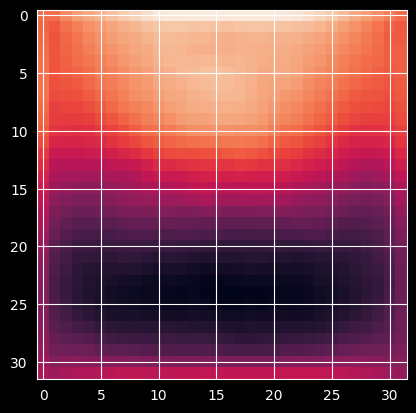

In [71]:
plt.imshow(mean_image[0])
plt.show()

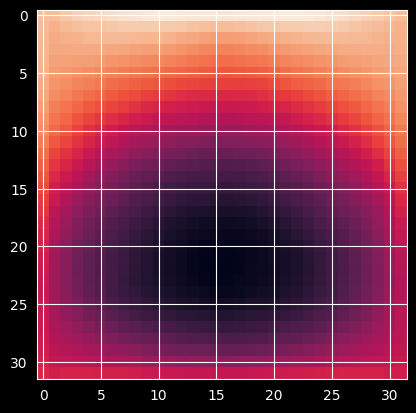

In [72]:
plt.imshow(mean_image[1])
plt.show()

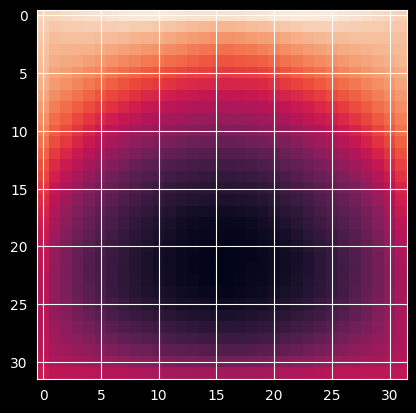

In [73]:
plt.imshow(mean_image[2])
plt.show()

seems like red is mostly at the bottom whereas blue and green are concentrated slightly above and more towards the middle. now lets take per pixel intensity histogram of some random pixels of random channels to avoid any clt effects and see if mce or bce is better suited for this case.